In [107]:
import pandas as pd
import gensim.utils
import numpy as np
from gensim.models.doc2vec import TaggedDocument, Doc2Vec
from gensim.models import Phrases
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from nltk.corpus import stopwords

# Данные

In [56]:
train_data = pd.read_csv('products_sentiment_train.tsv', sep='\t', header=None, names=['text', 'positive'])
train_data.head()

,text,positive
0,"2 . take around 10,000 640x480 pictures .",1
1,i downloaded a trial version of computer assoc...,1
2,the wrt54g plus the hga7t is a perfect solutio...,1
3,i dont especially like how music files are uns...,0
4,i was using the cheapie pail ... and it worked...,1


In [57]:
test_data = pd.read_csv('products_sentiment_test.tsv', sep='\t')
test_data.head()

,Id,text
0,0,"so , why the small digital elph , rather than ..."
1,1,3/4 way through the first disk we played on it...
2,2,better for the zen micro is outlook compatibil...
3,3,6 . play gameboy color games on it with goboy .
4,4,"likewise , i 've heard norton 2004 professiona..."


# Векторизация текстов

In [108]:
stop_words = set(stopwords.words('english'))

def create_doc(x, i):
    raw_tokens = gensim.utils.simple_preprocess(x, min_len=3)
    doc_tokens = []
    for token in raw_tokens:
        if token not in stop_words:
            doc_tokens.append(token)
    return TaggedDocument(doc_tokens, [i])

documents = []
for idx, row in train_data.iterrows():
    doc = create_doc(row.text, idx)
    documents.append(doc)

In [134]:
model = Doc2Vec(documents, vector_size=50, window=3, min_count=1, workers=4)

In [135]:
model.corpus_total_words

16691

In [136]:
def create_doc_vector(x):
    return model.infer_vector(gensim.utils.simple_preprocess(x))

vectors = []
for _, row in train_data.iterrows():
    vec = create_doc_vector(row.text)
    vectors.append(vec)
vectors = np.array(vectors)

# Визуализация данных

In [137]:
vec2 = TSNE(n_components=2, perplexity=20, learning_rate='auto', init='random', random_state=42).fit_transform(vectors)

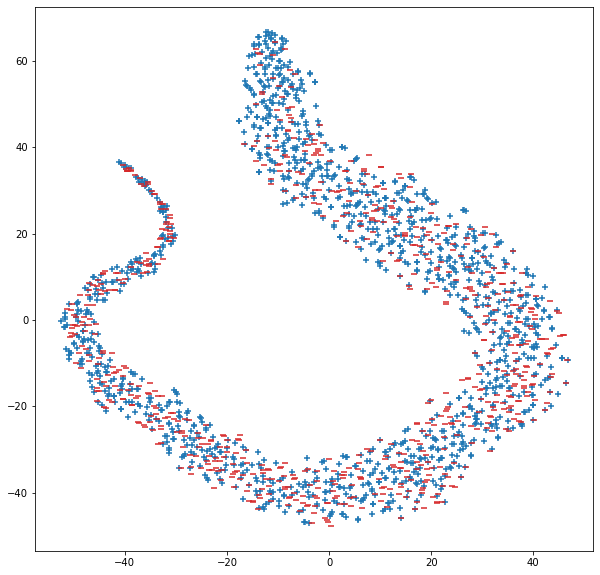

In [138]:
pos_vec2 = vec2[train_data.positive == 1]
neg_vec2 = vec2[train_data.positive == 0]

plt.figure(figsize=(10, 10))

plt.scatter(pos_vec2[:, 0], pos_vec2[:, 1], marker='+', color='tab:blue')
plt.scatter(neg_vec2[:, 0], neg_vec2[:, 1], marker='_', color='tab:red')